In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv")
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print(df.isnull().sum())

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64


In [8]:
print("No. of duplicate rows: ",df.duplicated().sum()) #to check for presence of any duplicate row

No. of duplicate rows:  3


In [9]:
df.drop_duplicates(inplace=True) #to drop the duplicate rows

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


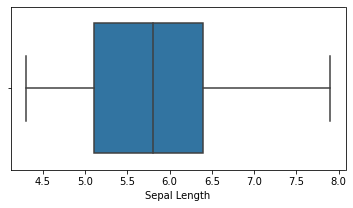

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


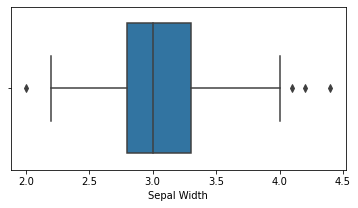

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


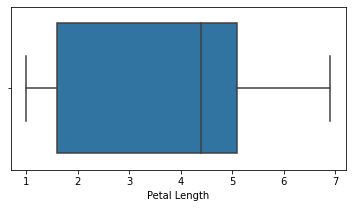

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


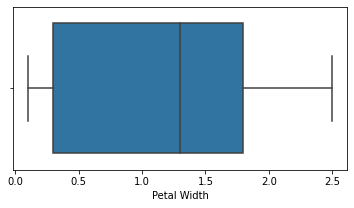

In [11]:
#check presence of outlier
for i in df.columns:
    if df[i].dtype == 'float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

In [15]:
#thier are outliers present in Sepal width
o1,o3 = np.percentile(df['Sepal Width'],[25,75])
iqr = o3-o1
lower_fence = o1 - (1.5*iqr)
upper_fence = o3 + (1.5*iqr)
df['Sepal Width'] = df['Sepal Width'].apply(lambda x: upper_fence if x>upper_fence 
                                              else lower_fence if x<lower_fence else x)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepal Width'>

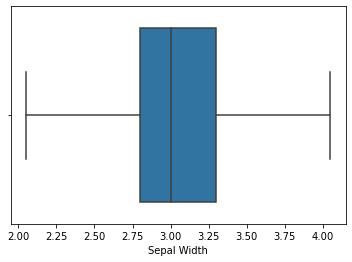

In [16]:
sns.boxplot(df['Sepal Width'])

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

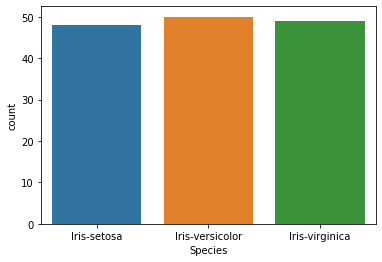

In [17]:
print(df.Species.value_counts())
sns.countplot(df['Species'])

In [19]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [21]:
#correlation matrix
corr= df.corr()
corr

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.110155,0.871305,0.817058
Sepal Width,-0.110155,1.000000,-0.420140,-0.355139
Petal Length,0.871305,-0.420140,1.000000,0.961883
Petal Width,0.817058,-0.355139,0.961883,1.000000


<AxesSubplot:>

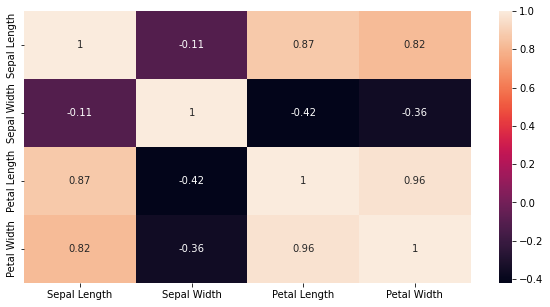

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [23]:
#K-means clustering
from sklearn.cluster import KMeans

In [25]:
a = []
for i in range(1,10):
    kmeans = KMeans(n_jobs=1, n_clusters=i, init='k-means++')
    kmeans.fit(df.iloc[:,[0,1,2,3]])
    a.append(kmeans.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dell\an

Text(0.5, 1.0, "'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")

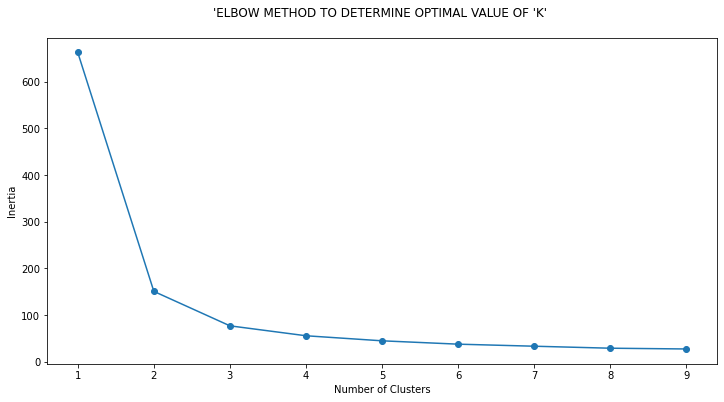

In [27]:
dataframe = pd.DataFrame({'Cluster':range(1,10), 'a':a})
plt.figure(figsize=(12,6))
plt.plot(dataframe['Cluster'],dataframe['a'],marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")

In [28]:
kmeans = KMeans(n_jobs=-1, n_clusters=3, init='k-means++')
kmeans.fit(df.iloc[: ,[0,1,2,3]])
kmeans.cluster_centers_

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [29]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [30]:
df['cluster']=kmeans.labels_
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [31]:
display(df['cluster'].value_counts(), df['Species'].value_counts())


2    61
1    48
0    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

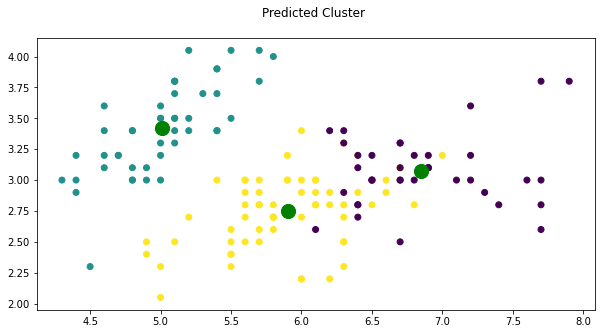

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df['Sepal Length'], df['Sepal Width'], c=df.cluster)
plt.title("Predicted Cluster \n")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='green', label='Centroids')
plt.show()

In [35]:
df.loc[df['Species']=='Iris-setosa']['cluster'].value_counts()

1    48
Name: cluster, dtype: int64

In [36]:
df.loc[df['Species']=='Iris-versicolor']['cluster'].value_counts()

2    48
0     2
Name: cluster, dtype: int64

In [37]:
df.loc[df['Species']=='Iris-virginica']['cluster'].value_counts()

0    36
2    13
Name: cluster, dtype: int64

In [38]:
df['Species-encoded'] = df['Species'].apply(lambda x : 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,cluster,Species-encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,2


<AxesSubplot:>

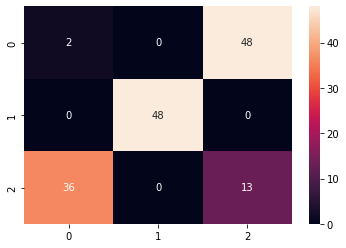

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df['Species-encoded'],df['cluster']),annot=True)